In [1]:
from turtledemo.nim import computerzug

from src.types import *
from src.clustering.likelihood import LikelihoodClustering

%load_ext autoreload
%autoreload 2

In [2]:

data_path = os.path.relpath('../FR_2007')


In [ ]:
market = Market.loader('2007/04/01','2007/05/01', data_path)

In [ ]:
data_path = os.path.relpath('../FR_2010')

market2010 = Market.loader('2010/04/01','2010/05/01', data_path)

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid", context="paper", font_scale=1.5)
FEATURES_KEYS = ['trade_price', 'trade_volume', 'spread', 'quote_volume_imbalance']
DATE_FORMAT = "%Y/%m/%d"

def plot_tick_density_comparison(market1, market2):

    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    from datetime import datetime

    def calculate_density(market):
        tick_df = pd.DataFrame([tick.to_dict() for tick in market.tick_data])

        if tick_df.empty:
            return None

        tick_df['hour'] = tick_df['timestamp'].apply(lambda ts: datetime.fromtimestamp(ts).hour)
        tick_df['date'] = tick_df['timestamp'].apply(lambda ts: datetime.fromtimestamp(ts).date())

        hourly_by_day = tick_df.groupby(['date', 'hour']).size().unstack(fill_value=0)

        hourly_by_day_density = hourly_by_day.div(hourly_by_day.sum(axis=1), axis=0).fillna(0)

        mean_density = hourly_by_day_density.mean(axis=0)
        variance_density = np.sqrt(hourly_by_day_density.var(axis=0))

        upper_bound = mean_density + variance_density
        lower_bound = mean_density - variance_density

        return pd.DataFrame({
            'hour': mean_density.index,
            'mean_density': mean_density.values,
            'upper_bound': upper_bound.values,
            'lower_bound': lower_bound.values
        })

    density1 = calculate_density(market1)
    density2 = calculate_density(market2)

    plt.figure(figsize=(12, 6))

    sns.lineplot(data=density1, x='hour', y='mean_density', label='Avril 2007 (Crisis)', color='blue')
    plt.fill_between(density1['hour'], density1['lower_bound'], density1['upper_bound'],
                     alpha=0.2, color='blue', label='Variance (2007)')

    sns.lineplot(data=density2, x='hour', y='mean_density', label='Avril 2010 (Stable)', color='green')
    plt.fill_between(density2['hour'], density2['lower_bound'], density2['upper_bound'],
                     alpha=0.2, color='green', label='Variance (2010)')

    plt.title("Tick Density Comparison by Hour of the Day", fontsize=14)
    plt.xlabel("Hour of the Day", fontsize=12)
    plt.ylabel("Density", fontsize=12)
    plt.xticks(ticks=range(0, 24), labels=range(0, 24))
    plt.grid(visible=True)
    plt.legend()
    plt.tight_layout()
    plt.xlim(8, 15)
    plt.show()

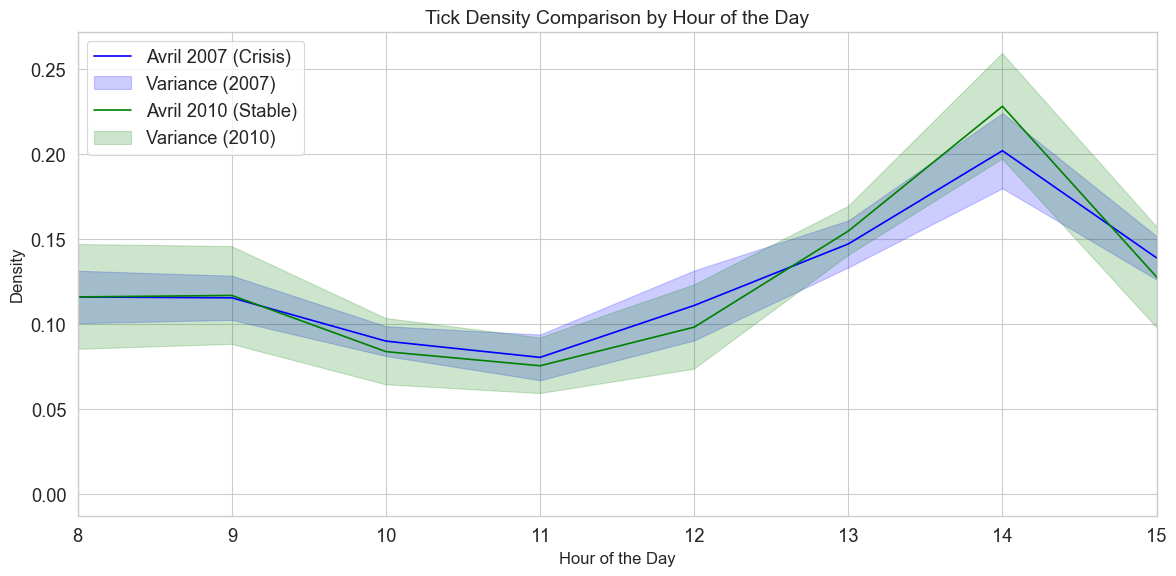

In [14]:
plot_tick_density_comparison(market, market2010)